In [1]:
import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
import dut_a0 as a0

from misc import *

# dut.drv.serUSB = 'COM19'
drv = dut.drv

ser = serial.Serial('COM3', 9600, timeout=2)
dut.connect(ser)

In [2]:
drv.clk_stop('ADC_CK')
drv.clk_stop('CK_ARRAY')
drv.clk_config('ADC_CK', divisor=2)
drv.clk_config('CK_ARRAY', divisor=2)
drv.clk_start('ADC_CK')
drv.clk_start('CK_ARRAY')

Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


In [3]:
dut.power_on()
dut.reset_chip()
dut.reset_dpe()

Setting vrefs to default
DAC initialized to a span from -10 V to 10 V


In [46]:
dut.disconnect()

In [33]:
dut.ground_PIC()
dut.power_off()
dut.disconnect()

DAC initialized to a span from -10 V to 10 V


In [17]:
arr = 1
rr = 13
cc = 9

Vgate = 5

targetG = 30e-6
targetTolerance = 4e-6

vSetRamp = np.arange(0.4, 3.5, 0.2)
vGateSetRamp = np.arange(0.6, 1.4, 0.05)
vResetRamp = np.arange(0.3, 3.8, 0.1)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 4

initG = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead
finalG = a0.cell_program(arr, rr, cc, targetG, targetTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
if ( (finalG >= (targetG-targetTolerance)) & (finalG <= (targetG+targetTolerance)) ):
    print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))
else:
    print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))


Success! Array 1 , device (row= 13 col= 9 ) Init G= 4.354394383719896e-05  Final G= 3.147605083088954e-05 Err= 1.4760508308895403e-06


In [35]:
arr = 1
rr = 13
cc = 9

Vgate = 5

targetG = 100e-6
targetTolerance = 10e-6

vSetRamp = np.arange(0.4, 3.5, 0.2)
vGateSetRamp = np.arange(0.6, 1.4, 0.05)
vResetRamp = np.arange(0.3, 3.8, 0.1)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 4

initG = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead
finalG = a0.cell_program(arr, rr, cc, targetG, targetTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
if ( (finalG >= (targetG-targetTolerance)) & (finalG <= (targetG+targetTolerance)) ):
    print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))
else:
    print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))

Success! Array 1 , device (row= 13 col= 9 ) Init G= 0.0001703052025632671  Final G= 0.00010948191593352881 Err= 9.48191593352881e-06


199.3123812675476


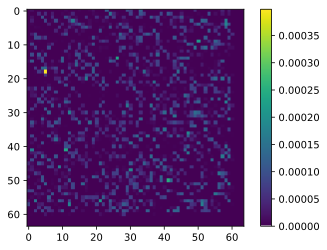

In [7]:
arr = 0
numRows = 64
numCols = 64
Gmap0 = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            #rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap0[rr,cc] = rdCurr/vRead
print(time.time()-ts)
plt.imshow(Gmap0)
plt.colorbar()

848.6342351436615


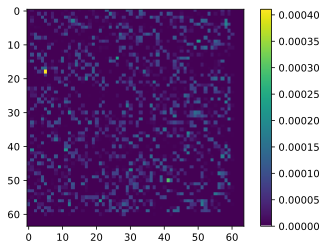

In [8]:
arr = 0
numRows = 64
numCols = 64
Gmap0slow = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            #rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap0slow[rr,cc] = rdCurr/vRead
print(time.time()-ts)
plt.imshow(Gmap0slow)
plt.colorbar()

843.420793056488


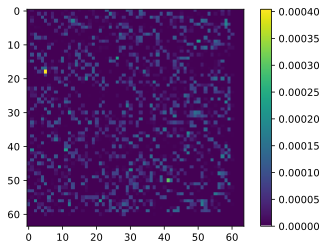

In [10]:
arr = 0
numRows = 64
numCols = 64
Gmap0slow2 = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            #rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap0slow2[rr,cc] = rdCurr/vRead
print(time.time()-ts)
plt.imshow(Gmap0slow2)
plt.colorbar()

240.3656280040741
247.19598579406738


Text(0.5, 1.0, 'Array 2')

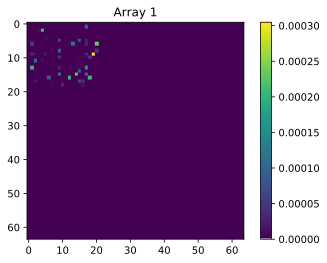

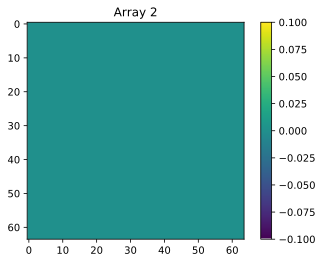

In [24]:
arr = 1
numRows = 64
numCols = 64
Gmap1 = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            #rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap1[rr,cc] = rdCurr/vRead
print(time.time()-ts)
ax,fig = plt.subplots()
plt.imshow(Gmap1)
plt.colorbar()
plt.title('Array 1')

arr = 2
numRows = 64
numCols = 64
Gmap2 = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            #rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap2[rr,cc] = rdCurr/vRead
print(time.time()-ts)
ax,fig = plt.subplots()
plt.imshow(Gmap2)
plt.colorbar()
plt.title('Array 2')

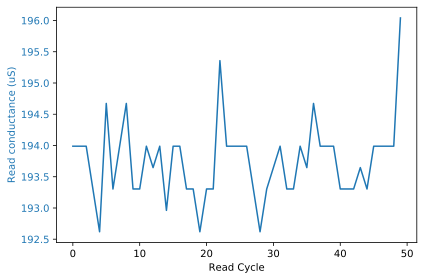

In [16]:
arr=2
rr=0
cc=1

Vgate = 5
Vref = 0.5
rdCurrs = []
numReads = 50
vRead = 0.05

for i in range(numReads):
    #rdCurrs.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    rdCurrs.append(a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1) / vRead)
    time.sleep(0.01)

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Read Cycle')
ax1.set_ylabel('Read conductance (uS)', color=color)
ax1.plot([i* 1e6 for i in rdCurrs], color=color)
ax1.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  
plt.show()

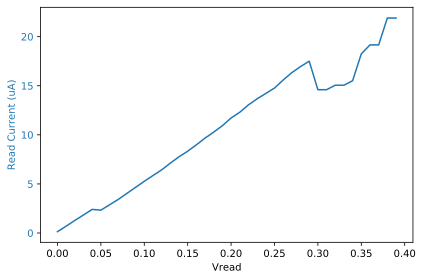

In [5]:
arr=2
rr=0
cc=1

Vreads = np.arange(0, 0.4, 0.01)
Vgate = 5
Vref = 0.5
rdCurrs = []
    
for vRead in Vreads:
    rdCurrs.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1))

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Vread')
ax1.set_ylabel('Read Current (uA)', color=color)
ax1.plot(Vreads, [i* 1e6 for i in rdCurrs], color=color)
ax1.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  
plt.show()

In [29]:
arr = 2
rr = 0
cc = 1

Vgate = 5

targetG = 10e-6
targetTolerance = 2e-6

vSetRamp = np.arange(0.3, 3.5, 0.05)
vGateSetRamp = np.arange(0.6, 1.4, 0.1)
vResetRamp = np.arange(0.3, 3.5, 0.1)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 3

initG = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead
#finalG = a0.cell_program(arr, rr, cc, targetG, targetTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
finalG = a0.cell_program_with_fb(arr, rr, cc, targetG, targetTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
if ( (finalG >= (targetG-targetTolerance)) & (finalG <= (targetG+targetTolerance)) ):
    print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))
else:
    print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))


Device (row= 0 col= 1 ) switched ON at V= 3.099999999999999
Device (row= 0 col= 1 ) switched ON at Vgate= 1.0999999999999999
Device (row= 0 col= 1 ) switched OFF at V= 0.8000000000000003
Device (row= 0 col= 1 ) switched OFF at Vgate= 5.0
Device (row= 0 col= 1 ) switched ON at V= 3.4499999999999993
Device (row= 0 col= 1 ) switched ON at Vgate= 1.1999999999999997
Device (row= 0 col= 1 ) switched OFF at V= 1.2000000000000004
Device (row= 0 col= 1 ) switched OFF at Vgate= 5.0
Fail! Array 2 , device (row= 0 col= 1 ) Init G= 0.0  Final G= 0.0 Err= -1e-05


In [8]:
arr = 2
rr = 0
cc = 1

Vgate = 5

targetG = 10e-6
targetTolerance = 2e-6

vSetRamp = np.arange(0.3, 3.5, 0.1)
vGateSetRamp = np.arange(0.6, 1.4, 0.1)
vResetRamp = np.arange(0.3, 3.5, 0.1)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 1

initG = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead
#finalG = a0.cell_program(arr, rr, cc, targetG, targetTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
finalG = a0.cell_program_with_fb(arr, rr, cc, targetG, targetTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
if ( (finalG >= (targetG-targetTolerance)) & (finalG <= (targetG+targetTolerance)) ):
    print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))
else:
    print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))

Device (row= 0 col= 1 ) switched ON at V= 3.000000000000001
Device (row= 0 col= 1 ) switched ON at Vgate= 0.9999999999999999
Fail! Array 2 , device (row= 0 col= 1 ) Init G= 0.0  Final G= 9.123492994460735e-05 Err= 8.123492994460735e-05


In [17]:
arr = 2
rr = 0
cc = 1

Vgate = 5

targetG = 10e-6
targetTolerance = 2e-6

vSetRamp = np.arange(0.3, 3.5, 0.1)
vGateSetRamp = np.arange(0.6, 1.4, 0.1)
vResetRamp = np.arange(0.3, 3.5, 0.05)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 1

initG = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead
#finalG = a0.cell_program(arr, rr, cc, targetG, targetTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
finalG = a0.cell_program_with_fb(arr, rr, cc, targetG, targetTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
if ( (finalG >= (targetG-targetTolerance)) & (finalG <= (targetG+targetTolerance)) ):
    print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))
else:
    print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))

Device (row= 0 col= 1 ) switched OFF at V= 1.0999999999999999
Device (row= 0 col= 1 ) switched OFF at Vgate= 5.0
Fail! Array 2 , device (row= 0 col= 1 ) Init G= 0.00018132942326490713  Final G= 7.903225806451612e-06 Err= -2.0967741935483893e-06


Working on number  0 , out of 124
Device (row= 0 col= 1 ) switched ON at V= 3.2000000000000006
Device (row= 0 col= 1 ) switched ON at Vgate= 0.9999999999999999
Device (row= 0 col= 1 ) switched OFF at V= 1.15
Device (row= 0 col= 1 ) switched OFF at Vgate= 5.0
Device (row= 0 col= 1 ) switched ON at V= 1.5000000000000004
Device (row= 0 col= 1 ) switched ON at Vgate= 0.6
Success! Array 2 , device (row= 0 col= 1 ) Init G= 0.0  Final G= 4.071358748778104e-05 Err= 7.135874877810367e-07
Working on number  1 , out of 124
Device (row= 1 col= 2 ) switched ON at V= 3.1000000000000005
Device (row= 1 col= 2 ) switched ON at Vgate= 1.0999999999999999
Device (row= 1 col= 2 ) switched OFF at V= 0.3
Device (row= 1 col= 2 ) switched OFF at Vgate= 5.0
Device (row= 1 col= 2 ) switched ON at V= 2.8000000000000007
Device (row= 1 col= 2 ) switched ON at Vgate= 1.1999999999999997
Fail! Array 2 , device (row= 1 col= 2 ) Init G= 0.0  Final G= 0.0001710654936461388 Err= 0.0001310654936461388
Working on number  2 

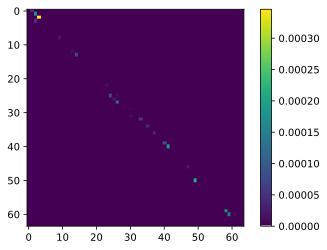

In [24]:
arr = 2
numRows = 64
numCols = 64
Vgate = 5
vRead = 0.2
Gmap2 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            #rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap2[rr,cc] = rdCurr/vRead

ts = time.time()
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('schroedinger_superT_v1.mat')
# Scale the conductances by 4x to get better separation
G_pos = 4*mat_contents['G_pos']
G_neg = 4*mat_contents['G_neg']

arr = 2

targetTolerance = 4e-6

targetG = np.zeros((64,64))
targetG[0:64,0:64] = G_pos[0:64,0:64]

targetGTolerance = np.ones((64,64))*targetTolerance

vSetRamp = np.arange(0.3, 3.5, 0.1)
vGateSetRamp = np.arange(0.6, 1.4, 0.1)
vResetRamp = np.arange(0.3, 3.5, 0.05)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
    
maxLoops = 3

DiffG = np.abs(Gmap2 - targetG)
rowscols=np.nonzero(DiffG > targetTolerance)
testRows = rowscols[0]
testCols = rowscols[1]

numDevices = np.size(testRows)
finalG = []
initG = []

for ii in range(numDevices):
    print('Working on number ', ii, ', out of', numDevices)
    rr = testRows[ii]
    cc = testCols[ii]       
    targetConductance = targetG[rr,cc]
    targetTol = targetGTolerance[rr,cc]
    initG.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    finalG.append(a0.cell_program_with_fb(arr, rr, cc, targetConductance, targetTol, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops))
    if ( (finalG[ii] >= (targetConductance-targetTol)) & (finalG[ii] <= (targetConductance+targetTol)) ):
        print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
    else:
        print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
        
        
arr = 2
numRows = 64
numCols = 64
Gmap2post = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            Gmap2post[rr,cc] = rdCurr/vRead
print(time.time()-ts)
plt.imshow(Gmap2post)
plt.colorbar()

save_workspace(vars(), note='RCLab1_Chp40_Arr2_LinEqGPos_After01')

Now turning ON
Set, Vgate =  0.4
94  are still too far below target Conductance
94  are still too far below target Conductance
94  are still too far below target Conductance
94  are still too far below target Conductance
93  are still too far below target Conductance
93  are still too far below target Conductance
93  are still too far below target Conductance
93  are still too far below target Conductance
93  are still too far below target Conductance
93  are still too far below target Conductance
93  are still too far below target Conductance
93  are still too far below target Conductance
93  are still too far below target Conductance
93  are still too far below target Conductance
93  are still too far below target Conductance
93  are still too far below target Conductance
93  are still too far below target Conductance
93  are still too far below target Conductance
93  are still too far below target Conductance
93  are still too far below target Conductance
93  are still too far below

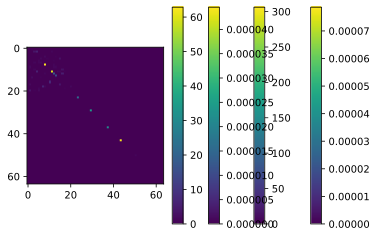

In [25]:
#First Program pattern G_Pos in Array 0
arr = 0
numRows = 64
numCols = 64
Vgate = 5
vRead = 0.2
Gmap0 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            #rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap0[rr,cc] = rdCurr/vRead

ts = time.time()
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('schroedinger_superT_v1.mat')
# Scale the conductances by 4x to get better separation
G_pos = 4*mat_contents['G_pos']
G_neg = 4*mat_contents['G_neg']

arr = 0

targetTolerance = 4e-6

targetG = np.zeros((64,64))
targetG[0:64,0:64] = G_pos[0:64,0:64]

targetGTolerance = np.ones((64,64))*targetTolerance


vSetRamp = np.arange(0.3, 3.6, 0.05)
vGateSetRamp = np.arange(0.4, 1.65, 0.05)
vResetRamp = np.arange(0.3, 4.3, 0.05)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 5

finalGM = a0.hybrid_array_program(targetG, targetGTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, arr, maxLoops=maxLoops)
        
arr = 0
numRows = 64
numCols = 64
Gmap0post = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            Gmap0post[rr,cc] = rdCurr/vRead
print(time.time()-ts)
plt.imshow(Gmap0post)
plt.colorbar()

save_workspace(vars(), note='RCLab1_Chp40_Arr0_LinEqGPos_After01')

from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('schroedinger_superT_v1.mat')
G_pos = 4*mat_contents['G_pos']

arr = 0
Vgate = 5
Vref = 0.5
vRead = 0.2

targetTolerance = 4e-6

targetG = np.zeros((64,64))
targetG[0:64,0:64] = G_pos[0:64,0:64]

targetGTolerance = np.ones((64,64))*targetTolerance

vSetRamp = np.arange(0.3, 3.5, 0.1)
vGateSetRamp = np.arange(0.6, 1.4, 0.1)
vResetRamp = np.arange(0.3, 3.5, 0.05)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
    
maxLoops = 3

DiffG = np.abs(Gmap0post - targetG)
rowscols=np.nonzero(DiffG > 10e-6)
testRows = rowscols[0]
testCols = rowscols[1]

numDevices = np.size(testRows)
finalG = []
initG = []

for ii in range(numDevices):
    print('Working on number ', ii, ', out of', numDevices)
    rr = testRows[ii]
    cc = testCols[ii]       
    targetConductance = targetG[rr,cc]
    targetTol = targetGTolerance[rr,cc]
    initG.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    finalG.append(a0.cell_program_with_fb(arr, rr, cc, targetConductance, targetTol, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops))
    if ( (finalG[ii] >= (targetConductance-targetTol)) & (finalG[ii] <= (targetConductance+targetTol)) ):
        print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
    else:
        print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
        

time.sleep(15)
arr = 0
numRows = 64
numCols = 64
Gmap0post2 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            Gmap0post2[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap0post2)
plt.colorbar()

time.sleep(15)
save_workspace(vars(), note='RCLab1_Chp40_Arr0_LinEq_After02')

#
#Now Program pattern G_Neg in Array 1
#
arr = 1
numRows = 64
numCols = 64
Vgate = 5
vRead = 0.2
Gmap1 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            Gmap1[rr,cc] = rdCurr/vRead

ts = time.time()
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('schroedinger_superT_v1.mat')
# Scale the conductances by 4x to get better separation
G_pos = 4*mat_contents['G_pos']
G_neg = 4*mat_contents['G_neg']

arr = 1

targetTolerance = 4e-6

targetG = np.zeros((64,64))
targetG[0:64,0:64] = G_neg[0:64,0:64]

targetGTolerance = np.ones((64,64))*targetTolerance


vSetRamp = np.arange(0.3, 3.6, 0.05)
vGateSetRamp = np.arange(0.4, 1.65, 0.05)
vResetRamp = np.arange(0.3, 4.3, 0.05)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 5

finalGM = a0.hybrid_array_program(targetG, targetGTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, arr, maxLoops=maxLoops)
        
arr = 1
numRows = 64
numCols = 64
Gmap1post = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            Gmap1post[rr,cc] = rdCurr/vRead
print(time.time()-ts)
plt.imshow(Gmap1post)
plt.colorbar()

save_workspace(vars(), note='RCLab1_Chp40_Arr1_LinEqGNeg_After01')

from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('schroedinger_superT_v1.mat')
G_neg = 4*mat_contents['G_neg']

arr = 1
Vgate = 5
Vref = 0.5
vRead = 0.2

targetTolerance = 4e-6

targetG = np.zeros((64,64))
targetG[0:64,0:64] = G_neg[0:64,0:64]

targetGTolerance = np.ones((64,64))*targetTolerance

vSetRamp = np.arange(0.3, 3.5, 0.1)
vGateSetRamp = np.arange(0.6, 1.4, 0.1)
vResetRamp = np.arange(0.3, 3.5, 0.05)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
    
maxLoops = 3

DiffG = np.abs(Gmap1post - targetG)
rowscols=np.nonzero(DiffG > 10e-6)
testRows = rowscols[0]
testCols = rowscols[1]

numDevices = np.size(testRows)
finalG = []
initG = []

for ii in range(numDevices):
    print('Working on number ', ii, ', out of', numDevices)
    rr = testRows[ii]
    cc = testCols[ii]       
    targetConductance = targetG[rr,cc]
    targetTol = targetGTolerance[rr,cc]
    initG.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    finalG.append(a0.cell_program_with_fb(arr, rr, cc, targetConductance, targetTol, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops))
    if ( (finalG[ii] >= (targetConductance-targetTol)) & (finalG[ii] <= (targetConductance+targetTol)) ):
        print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
    else:
        print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
        

time.sleep(15)
arr = 1
numRows = 64
numCols = 64
Gmap1post2 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            Gmap1post2[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap1post2)
plt.colorbar()

time.sleep(15)
save_workspace(vars(), note='RCLab1_Chp40_Arr1_LinEq_After02')

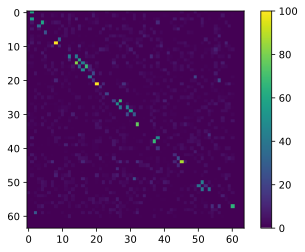

In [31]:
plt.imshow(Gmap0post2, clim=[0,100])
plt.colorbar()

Working on number  0 out of 96
Success! Array 0 , device (row= 2 col= 3 ) Init G= 6.56891495601173e-06  Final G= 3.626588465298143e-05 Err= -3.734115347018573e-06 Vfin= 0.9000000000000001 VGfin= 5.0


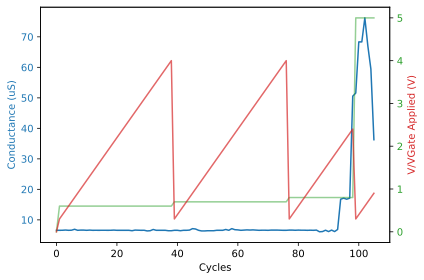

Working on number  1 out of 96
Success! Array 0 , device (row= 4 col= 5 ) Init G= 9.528347996089931e-06  Final G= 4.148338220918865e-05 Err= 1.483382209188648e-06 Vfin= 3.800000000000001 VGfin= 0.9999999999999999


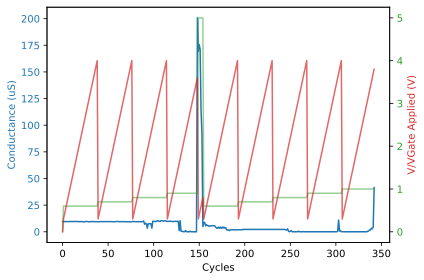

Working on number  2 out of 96
Success! Array 0 , device (row= 5 col= 4 ) Init G= 0.0  Final G= 3.814760508308895e-05 Err= -1.8523949169110509e-06 Vfin= 1.7000000000000004 VGfin= 0.9999999999999999


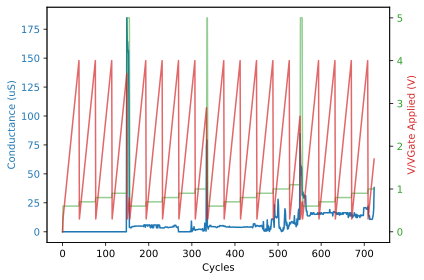

Working on number  3 out of 96
Success! Array 0 , device (row= 5 col= 6 ) Init G= 0.0  Final G= 3.626588465298143e-05 Err= -3.734115347018573e-06 Vfin= 2.1000000000000005 VGfin= 0.6


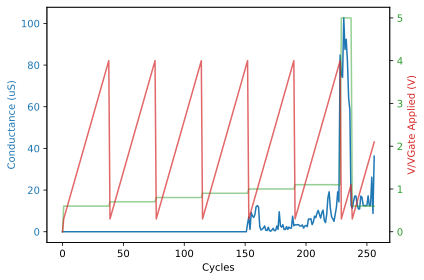

Working on number  4 out of 96
Success! Array 0 , device (row= 6 col= 7 ) Init G= 0.0  Final G= 4.379276637341154e-05 Err= 3.7927663734115363e-06 Vfin= 1.0000000000000002 VGfin= 5.0


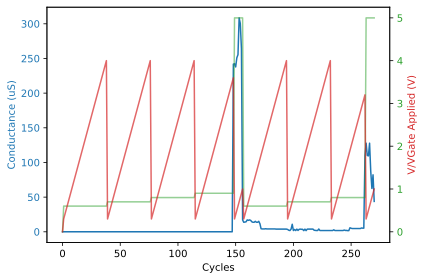

Working on number  5 out of 96
Fail! Array 0 , device (row= 7 col= 6 ) Init G= 0.0  Final G= 0.000229227761485826 Err= 0.000189227761485826


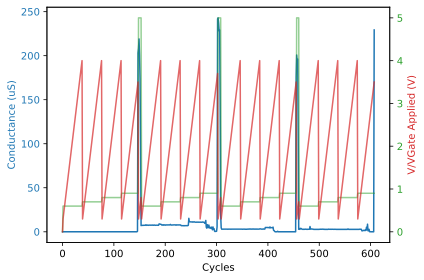

Working on number  6 out of 96
Success! Array 0 , device (row= 7 col= 8 ) Init G= 0.0  Final G= 4.071358748778104e-05 Err= 7.135874877810367e-07 Vfin= 2.8000000000000007 VGfin= 0.6


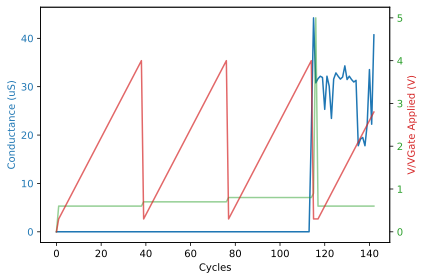

Working on number  7 out of 96
Success! Array 0 , device (row= 8 col= 7 ) Init G= 0.0  Final G= 3.917399804496578e-05 Err= -8.260019550342199e-07 Vfin= 0.3 VGfin= 5.0


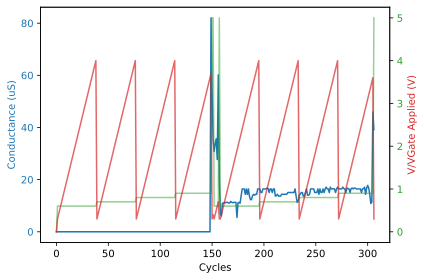

Working on number  8 out of 96
Success! Array 0 , device (row= 9 col= 8 ) Init G= 0.00030050505050505046  Final G= 4.191104594330401e-05 Err= 1.9110459433040072e-06 Vfin= 2.6000000000000005 VGfin= 0.8999999999999999


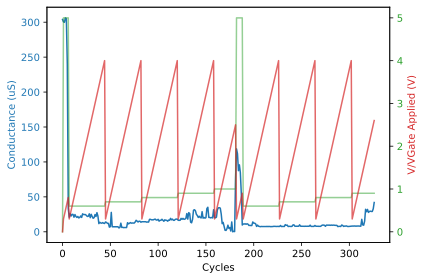

Working on number  9 out of 96
Success! Array 0 , device (row= 9 col= 10 ) Init G= 0.0  Final G= 4.182551319648093e-05 Err= 1.8255131964809272e-06 Vfin= 0.6000000000000001 VGfin= 5.0


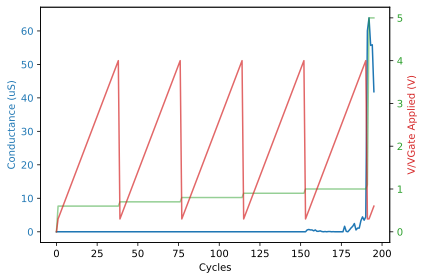

In [17]:
arr = 0
numRows = 30
numCols = 30
Vgate = 5
vRead = 0.2
#Gmap0 = np.zeros((64, 64))
#for rr in range(numRows):
#        for cc in range(numCols):
#            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
#            #rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
#            Gmap0[rr,cc] = rdCurr/vRead

ts = time.time()

from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('schroedinger_superT_v1.mat')
# Scale the conductances by 4x to get better separation
G_pos = 4*mat_contents['G_pos']
G_neg = 4*mat_contents['G_neg']

arr = 0
Vgate = 5
Vref = 0.5
vRead = 0.2

targetTolerance = 4e-6

targetG = np.zeros((64,64))
targetG[0:64,0:64] = G_pos[0:64,0:64]

targetGTolerance = np.ones((64,64))*targetTolerance

vSetRamp = np.arange(0.3, 4.1, 0.1)
vGateSetRamp = np.arange(0.6, 1.4, 0.1)
vResetRamp = np.arange(0.3, 3.5, 0.1)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
    
maxLoops = 7

DiffG = np.abs(Gmap0 - targetG)
rowscols=np.nonzero(DiffG > 35e-6)
testRows = rowscols[0]
testCols = rowscols[1]

numDevices = np.size(testRows)
finalG = []
initG = []
maxDevices = 10
numSwitchDevices = min(numDevices,maxDevices)
for ii in range(numSwitchDevices ):
    print('Working on number ', ii, 'out of', numDevices)
    rr = testRows[ii]
    cc = testCols[ii]       
    targetConductance = targetG[rr,cc]
    targetTol = targetGTolerance[rr,cc]
    initG.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    currG, GHistory, VHistory, VGateHistory = a0.cell_program_with_history(arr, rr, cc, targetConductance, targetTol, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
    finalG.append(currG)
    if ( (finalG[ii] >= (targetConductance-targetTol)) & (finalG[ii] <= (targetConductance+targetTol)) ):
        print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance), 'Vfin=',VHistory[-1],'VGfin=',VGateHistory[-1])
    else:
        print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
        
    tgG = GHistory*0  + targetConductance
    fig, ax1 = plt.subplots()
    color = 'tab:blue'
    color2 = 'tab:black'
    ax1.set_xlabel('Cycles')
    ax1.set_ylabel('Conductance (uS)', color=color)
    ax1.plot([i* 1e6 for i in GHistory], color=color, zorder=10)
    ax1.plot([i* 1e6 for i in tgG], '--', color=color2)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:red'
    # we already handled the x-label with ax1
    ax2.set_ylabel('V/VGate Applied (V)', color=color)
    ax2.plot(VHistory, color=color, alpha=0.7)
    color = 'tab:green'
    ax2.plot(VGateHistory, color=color, zorder=1, alpha=0.5)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()   
    

In [6]:
arr = 0
numRows = 64
numCols = 64
Vgate = 5
vRead = 0.2
Gmap0 = np.zeros((64, 64))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            #rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap0[rr,cc] = rdCurr/vRead

ts = time.time()

from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('schroedinger_superT_v1.mat')
# Scale the conductances by 4x to get better separation
G_pos = 4*mat_contents['G_pos']
G_neg = 4*mat_contents['G_neg']

arr = 0
Vgate = 5
Vref = 0.5
vRead = 0.2

targetTolerance = 4e-6

targetG = np.zeros((64,64))
targetG[0:64,0:64] = G_pos[0:64,0:64]

targetGTolerance = np.ones((64,64))*targetTolerance

vSetRamp = np.arange(0.3, 4.3, 0.1)
vGateSetRamp = np.arange(0.6, 1.4, 0.1)
vResetRamp = np.arange(0.3, 3.5, 0.1)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
    
maxLoops = 7

DiffG = np.abs(Gmap0 - targetG)
rowscols=np.nonzero(DiffG > 4e-6)
testRows = rowscols[0]
testCols = rowscols[1]

numDevices = np.size(testRows)
finalG = []
initG = []
allGHistory = []
allVHistory = []
allVGateHistory = []
for ii in range(numDevices):
    print('Working on number ', ii, 'out of', numDevices)
    rr = testRows[ii]
    cc = testCols[ii]       
    targetConductance = targetG[rr,cc]
    targetTol = targetGTolerance[rr,cc]
    initG.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    currG, GHistory, VHistory, VGateHistory = a0.cell_program_with_history(arr, rr, cc, targetConductance, targetTol, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
    finalG.append(currG)
    allGHistory.append(GHistory)
    allVHistory.append(VHistory)
    allVGateHistory.append(VGateHistory)
    if ( (finalG[ii] >= (targetConductance-targetTol)) & (finalG[ii] <= (targetConductance+targetTol)) ):
        print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance), 'Vfin=',VHistory[-1],'VGfin=',VGateHistory[-1])
    else:
        print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
        
#    tgG = GHistory*0  + targetConductance
#    fig, ax1 = plt.subplots()
#    color = 'tab:blue'
#    color2 = 'tab:black'
#    ax1.set_xlabel('Cycles')
#    ax1.set_ylabel('Conductance (uS)', color=color)
#    ax1.plot([i* 1e6 for i in GHistory], color=color, zorder=10)
#    ax1.plot([i* 1e6 for i in tgG], '--', color=color2)
#    ax1.tick_params(axis='y', labelcolor=color)
#    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
#    color = 'tab:red'
#    # we already handled the x-label with ax1
#    ax2.set_ylabel('V/VGate Applied (V)', color=color)
#    ax2.plot(VHistory, color=color, alpha=0.7)
#    color = 'tab:green'
#    ax2.plot(VGateHistory, color=color, zorder=1, alpha=0.5)
#    ax2.tick_params(axis='y', labelcolor=color)
#    fig.tight_layout()  # otherwise the right y-label is slightly clipped
#    plt.show()   

save_workspace(vars(), note='RCLab1_Chp40_Arr0_LinEqGPos_After02')

Working on number  0 out of 320
Success! Array 0 , device (row= 0 col= 1 ) Init G= 5.610948191593352e-06  Final G= 3.840420332355816e-05 Err= -1.5957966764418448e-06 Vfin= 1.5000000000000004 VGfin= 0.7
Working on number  1 out of 320
Success! Array 0 , device (row= 1 col= 2 ) Init G= 3.96871945259042e-06  Final G= 4.379276637341154e-05 Err= 3.7927663734115363e-06 Vfin= 2.5000000000000004 VGfin= 0.8999999999999999
Working on number  2 out of 320
Success! Array 0 , device (row= 1 col= 4 ) Init G= 6.226783968719452e-06  Final G= 2.7370478983382204e-06 Err= 2.7370478983382204e-06 Vfin= 1.3000000000000005 VGfin= 5.0
Working on number  3 out of 320
Success! Array 0 , device (row= 1 col= 10 ) Init G= 5.063538611925708e-06  Final G= 5.81622678396872e-07 Err= 5.81622678396872e-07 Vfin= 1.4000000000000004 VGfin= 5.0
Working on number  4 out of 320
Success! Array 0 , device (row= 1 col= 19 ) Init G= 7.338709677419355e-06  Final G= 3.900293255131964e-06 Err= 3.900293255131964e-06 Vfin= 1.400000000

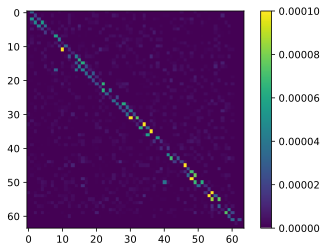

In [7]:
arr = 0
numRows = 64
numCols = 64
Vgate = 5
vRead = 0.2
Gmap0post = np.zeros((64, 64))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            #rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap0post[rr,cc] = rdCurr/vRead
            
plt.imshow(Gmap0post, clim=[0, 100e-6])
plt.colorbar()

In [13]:

from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('schroedinger_superT_v1.mat')
# Scale the conductances by 4x to get better separation
G_pos = 4*mat_contents['G_pos']
G_neg = 4*mat_contents['G_neg']

arr = 0
Vgate = 5
Vref = 0.5
vRead = 0.2

targetTolerance = 4e-6

targetG = np.zeros((64,64))
targetG[0:64,0:64] = G_pos[0:64,0:64]

targetGTolerance = np.ones((64,64))*targetTolerance

vSetRamp = np.arange(0.3, 4.3, 0.1)
vGateSetRamp = np.arange(0.6, 1.4, 0.1)
vResetRamp = np.arange(0.3, 3.5, 0.1)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
    
maxLoops = 7

DiffG = np.abs(Gmap0post - targetG)
rowscols=np.nonzero(DiffG > 8e-6)
testRows = rowscols[0]
testCols = rowscols[1]

numDevices = np.size(testRows)
finalG = []
initG = []
allGHistory = []
allVHistory = []
allVGateHistory = []
for ii in range(numDevices):
    print('Working on number ', ii, 'out of', numDevices)
    rr = testRows[ii]
    cc = testCols[ii]       
    targetConductance = targetG[rr,cc]
    targetTol = targetGTolerance[rr,cc]
    initG.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    currG, GHistory, VHistory, VGateHistory = a0.cell_program_with_history(arr, rr, cc, targetConductance, targetTol, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
    finalG.append(currG)
    allGHistory.append(GHistory)
    allVHistory.append(VHistory)
    allVGateHistory.append(VGateHistory)
    if ( (finalG[ii] >= (targetConductance-targetTol)) & (finalG[ii] <= (targetConductance+targetTol)) ):
        print('SUCCESS! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance), 'Vfin=',VHistory[-1],'VGfin=',VGateHistory[-1])
    else:
        print('FAIL! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
     
save_workspace(vars(), note='RCLab1_Chp40_Arr0_LinEqGPos_After03')

Working on number  0 out of 120
SUCCESS! Array 0 , device (row= 0 col= 1 ) Init G= 1.642228739002932e-05  Final G= 3.8318670576735085e-05 Err= -1.681329423264918e-06 Vfin= 1.3000000000000005 VGfin= 0.9999999999999999
Working on number  1 out of 120
SUCCESS! Array 0 , device (row= 1 col= 2 ) Init G= 2.052785923753666e-05  Final G= 4.011485826001954e-05 Err= 1.1485826001953782e-07 Vfin= 2.5000000000000004 VGfin= 1.0999999999999999
Working on number  2 out of 120
SUCCESS! Array 0 , device (row= 1 col= 57 ) Init G= 9.186217008797652e-06  Final G= 5.474095796676442e-07 Err= 5.474095796676442e-07 Vfin= 2.1000000000000005 VGfin= 5.0
Working on number  3 out of 120
SUCCESS! Array 0 , device (row= 2 col= 1 ) Init G= 4.909579667644184e-05  Final G= 3.643695014662756e-05 Err= -3.5630498533724403e-06 Vfin= 1.0000000000000002 VGfin= 5.0
Working on number  4 out of 120
SUCCESS! Array 0 , device (row= 2 col= 3 ) Init G= 9.802052785923753e-06  Final G= 3.780547409579667e-05 Err= -2.19452590420333e-06 

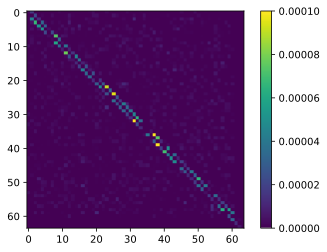

In [14]:
arr = 0
numRows = 64
numCols = 64
Vgate = 5
vRead = 0.2
Gmap0post2 = np.zeros((64, 64))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            #rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap0post2[rr,cc] = rdCurr/vRead
            
plt.imshow(Gmap0post2, clim=[0, 100e-6])
plt.colorbar()

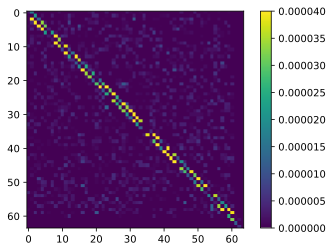

In [16]:
plt.imshow(Gmap0post2, clim=[0, 40e-6])
plt.colorbar()

In [23]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('schroedinger_superT_v1.mat')
# Scale the conductances by 4x to get better separation
G_pos = 4*mat_contents['G_pos']
G_neg = 4*mat_contents['G_neg']

arr = 0
Vgate = 5
Vref = 0.5
vRead = 0.2

targetTolerance = 4e-6

targetG = np.zeros((64,64))
targetG[0:64,0:64] = G_pos[0:64,0:64]

targetGTolerance = np.ones((64,64))*targetTolerance

vSetRamp = np.arange(0.5, 4.0, 0.05)
vGateSetRamp = np.arange(0.6, 1.5, 0.05)
vResetRamp = np.arange(0.4, 3.5, 0.05)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
    
maxLoops = 8

DiffG = np.abs(Gmap0post2 - targetG)
rowscols=np.nonzero(DiffG > 4e-6)
testRows = rowscols[0]
testCols = rowscols[1]

numDevices = np.size(testRows)
finalG = []
initG = []
allGHistory = []
allVHistory = []
allVGateHistory = []
for ii in range(numDevices):
    print('Working on number ',ii, ' out of', numDevices)
    rr = testRows[ii]
    cc = testCols[ii]       
    targetConductance = targetG[rr,cc]`
    targetTol = targetGTolerance[rr,cc]
    initG.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    currG, GHistory, VHistory, VGateHistory = a0.cell_program_with_history(arr, rr, cc, targetConductance, targetTol, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
    finalG.append(currG)
    allGHistory.append(GHistory)
    allVHistory.append(VHistory)
    allVGateHistory.append(VGateHistory)
    if ( (finalG[ii] >= (targetConductance-targetTol)) & (finalG[ii] <= (targetConductance+targetTol)) ):
        print('SUCCESS! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance), 'Vfin=',VHistory[-1],'VGfin=',VGateHistory[-1])
    else:
        print('FAIL! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
     
save_workspace(vars(), note='RCLab1_Chp40_Arr0_LinEqGPos_After04')

Working on number  0  out of 243
SUCCESS! Array 0 , device (row= 0 col= 1 ) Init G= 1.642228739002932e-05  Final G= 3.934506353861192e-05 Err= -6.549364613880803e-07 Vfin= 2.650000000000002 VGfin= 0.65
Working on number  1  out of 243
SUCCESS! Array 0 , device (row= 1 col= 2 ) Init G= 1.216275659824047e-05  Final G= 4.268084066471163e-05 Err= 2.6808406647116253e-06 Vfin= 0.4 VGfin= 5.0
Working on number  2  out of 243
SUCCESS! Array 0 , device (row= 1 col= 12 ) Init G= 3.985826001955034e-06  Final G= 3.96871945259042e-06 Err= 3.96871945259042e-06 Vfin= 0.5 VGfin= 5.0
Working on number  3  out of 243
SUCCESS! Array 0 , device (row= 1 col= 25 ) Init G= 2.189638318670577e-06  Final G= 3.848973607038123e-06 Err= 3.848973607038123e-06 Vfin= 0 VGfin= 0
Working on number  4  out of 243
SUCCESS! Array 0 , device (row= 2 col= 1 ) Init G= 3.8318670576735085e-05  Final G= 3.8318670576735085e-05 Err= -1.681329423264918e-06 Vfin= 0 VGfin= 0
Working on number  5  out of 243
FAIL! Array 0 , device (r

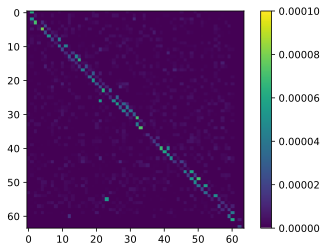

In [24]:
arr = 0
numRows = 64
numCols = 64
Vgate = 5
vRead = 0.2
Gmap0post3 = np.zeros((64, 64))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            #rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap0post3[rr,cc] = rdCurr/vRead
            
plt.imshow(Gmap0post3, clim=[0, 100e-6])
plt.colorbar()

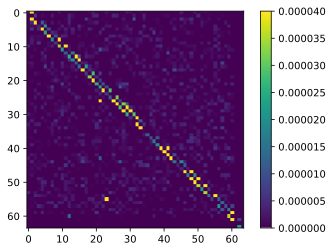

In [26]:
plt.imshow(Gmap0post3, clim=[0, 40e-6])
plt.colorbar()

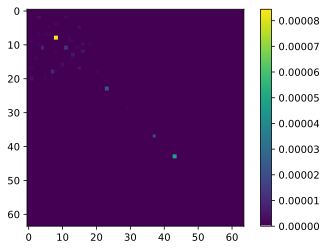

In [27]:
arr = 1
numRows = 64
numCols = 64
Vgate = 5
vRead = 0.2
Gmap1 = np.zeros((64, 64))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            #rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap1[rr,cc] = rdCurr/vRead
            
plt.imshow(Gmap1)
plt.colorbar()

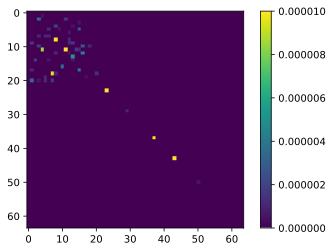

In [29]:
plt.imshow(Gmap1, clim=[0, 10e-6])
plt.colorbar()

In [31]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('schroedinger_superT_v1.mat')
# Scale the conductances by 4x to get better separation
G_neg = 4*mat_contents['G_neg']

arr = 1
Vgate = 5
Vref = 0.5
vRead = 0.2

targetTolerance = 4e-6

targetG = np.zeros((64,64))
targetG[0:64,0:64] = G_neg[0:64,0:64]

targetGTolerance = np.ones((64,64))*targetTolerance

vSetRamp = np.arange(0.5, 4.4, 0.05)
vGateSetRamp = np.arange(0.5, 1.4, 0.05)
vResetRamp = np.arange(0.3, 3.75, 0.05)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
    
maxLoops = 6

DiffG = np.abs(Gmap1 - targetG)
rowscols=np.nonzero(DiffG > 4e-6)
testRows = rowscols[0]
testCols = rowscols[1]

numDevices = np.size(testRows)
finalG = []
initG = []
allGHistory = []
allVHistory = []
allVGateHistory = []
for ii in range(numDevices):
    print('Working on number ',ii, ' out of', numDevices)
    rr = testRows[ii]
    cc = testCols[ii]       
    targetConductance = targetG[rr,cc]
    targetTol = targetGTolerance[rr,cc]
    initG.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    currG, GHistory, VHistory, VGateHistory = a0.cell_program_with_history(arr, rr, cc, targetConductance, targetTol, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
    finalG.append(currG)
    allGHistory.append(GHistory)
    allVHistory.append(VHistory)
    allVGateHistory.append(VGateHistory)
    if ( (finalG[ii] >= (targetConductance-targetTol)) & (finalG[ii] <= (targetConductance+targetTol)) ):
        print('SUCCESS! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance), 'Vfin=',VHistory[-1],'VGfin=',VGateHistory[-1])
    else:
        print('FAIL! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
     
arr = 1
numRows = 64
numCols = 64
Vgate = 5
vRead = 0.2
Gmap1 = np.zeros((64, 64))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            #rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap1[rr,cc] = rdCurr/vRead
          
save_workspace(vars(), note='RCLab1_Chp40_Arr1_LinEqGNeg_After01')

Working on number  0  out of 68
SUCCESS! Array 1 , device (row= 0 col= 0 ) Init G= 0.0  Final G= 8.211143695014662e-05 Err= 2.1114369501466182e-06 Vfin= 0.5999999999999999 VGfin= 5.0
Working on number  1  out of 68
SUCCESS! Array 1 , device (row= 1 col= 1 ) Init G= 0.0  Final G= 8.202590420332356e-05 Err= 2.025904203323552e-06 Vfin= 0.3 VGfin= 5.0
Working on number  2  out of 68
SUCCESS! Array 1 , device (row= 2 col= 2 ) Init G= 0.0  Final G= 7.65518084066471e-05 Err= -3.4481915933529025e-06 Vfin= 0.7000000000000002 VGfin= 0.5
Working on number  3  out of 68
SUCCESS! Array 1 , device (row= 3 col= 3 ) Init G= 0.0  Final G= 8.134164222873901e-05 Err= 1.3416422287390069e-06 Vfin= 0.9999999999999998 VGfin= 5.0
Working on number  4  out of 68
FAIL! Array 1 , device (row= 4 col= 4 ) Init G= 0.0  Final G= 3.558162267839687e-06 Err= -7.644183773216032e-05
Working on number  5  out of 68
SUCCESS! Array 1 , device (row= 5 col= 5 ) Init G= 0.0  Final G= 8.202590420332356e-05 Err= 2.02590420332355

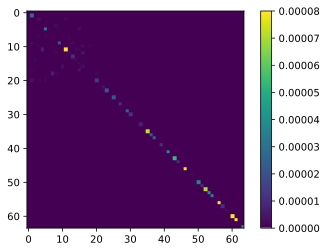

In [44]:
plt.imshow(Gmap1, clim=[0,80e-6])
plt.colorbar()

8e-05
8e-05


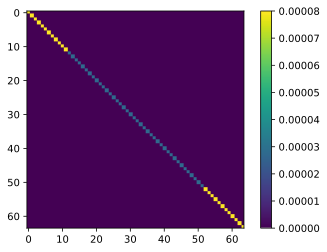

In [43]:
plt.imshow(targetG, clim=[0,80e-6])
plt.colorbar()
print(max(targetG.flatten()))
print(targetG[9,9])

In [45]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('schroedinger_superT_v1.mat')
# Scale the conductances by 4x to get better separation
G_neg = 4*mat_contents['G_neg']

arr = 1
Vgate = 5
Vref = 0.5
vRead = 0.2

targetTolerance = 4e-6

targetG = np.zeros((64,64))
targetG[0:64,0:64] = G_neg[0:64,0:64]

targetGTolerance = np.ones((64,64))*targetTolerance

vSetRamp = np.arange(0.5, 4.5, 0.05)
vGateSetRamp = np.arange(0.4, 1.4, 0.05)
vResetRamp = np.arange(0.3, 3.75, 0.05)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
    
maxLoops = 10

DiffG = np.abs(Gmap1 - targetG)
rowscols=np.nonzero(DiffG > 20e-6)
testRows = rowscols[0]
testCols = rowscols[1]

numDevices = np.size(testRows)
finalG = []
initG = []
allGHistory = []
allVHistory = []
allVGateHistory = []
for ii in range(numDevices):
    print('Working on number ',ii, ' out of', numDevices)
    rr = testRows[ii]
    cc = testCols[ii]       
    targetConductance = targetG[rr,cc]
    targetTol = targetGTolerance[rr,cc]
    initG.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    currG, GHistory, VHistory, VGateHistory = a0.cell_program_with_history(arr, rr, cc, targetConductance, targetTol, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
    finalG.append(currG)
    allGHistory.append(GHistory)
    allVHistory.append(VHistory)
    allVGateHistory.append(VGateHistory)
    if ( (finalG[ii] >= (targetConductance-targetTol)) & (finalG[ii] <= (targetConductance+targetTol)) ):
        print('SUCCESS! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance), 'Vfin=',VHistory[-1],'VGfin=',VGateHistory[-1])
    else:
        print('FAIL! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
     
arr = 1
numRows = 64
numCols = 64
Vgate = 5
vRead = 0.2
Gmap1post2 = np.zeros((64, 64))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            #rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap1post2[rr,cc] = rdCurr/vRead
          
save_workspace(vars(), note='RCLab1_Chp40_Arr1_LinEqGNeg_After02')

Working on number  0  out of 46
FAIL! Array 1 , device (row= 0 col= 0 ) Init G= 0.0  Final G= 1.1752199413489738e-05 Err= -6.824780058651027e-05
Working on number  1  out of 46
SUCCESS! Array 1 , device (row= 1 col= 1 ) Init G= 2.3264907135874877e-05  Final G= 7.65518084066471e-05 Err= -3.4481915933529025e-06 Vfin= 0.5 VGfin= 0.4
Working on number  2  out of 46
SUCCESS! Array 1 , device (row= 2 col= 2 ) Init G= 0.0  Final G= 7.928885630498534e-05 Err= -7.111436950146686e-07 Vfin= 0.55 VGfin= 0.4
Working on number  3  out of 46
SUCCESS! Array 1 , device (row= 3 col= 3 ) Init G= 0.0  Final G= 7.754969045291626e-05 Err= -2.4503095470837445e-06 Vfin= 0.6499999999999999 VGfin= 5.0
Working on number  4  out of 46
SUCCESS! Array 1 , device (row= 4 col= 4 ) Init G= 0.0  Final G= 7.65518084066471e-05 Err= -3.4481915933529025e-06 Vfin= 0.39999999999999997 VGfin= 5.0
Working on number  5  out of 46
SUCCESS! Array 1 , device (row= 5 col= 5 ) Init G= 5.739247311827957e-05  Final G= 7.75496904529162

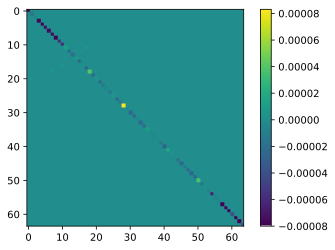

In [53]:
plt.imshow(Gmap1post2-targetG)
plt.colorbar()

In [61]:
errors = (Gmap1post2-targetG)
#plt.imshow(errors)
#plt.colorbar()
plt.hist(1e6*errors.flatten(), bins=60)

(array([   9,    3,    0,    0,    1,    0,    0,    2,    0,    0,    0,
           0,    1,    0,    0,    1,    0,    0,    0,   15,    0,    2,
           0,    5,    2,    1,    1,    6,    1, 4019,   13,    7,    1,
           2,    0,    0,    1,    0,    0,    0,    0,    0,    1,    0,
           1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    1], dtype=int32),
 array([-80.        , -77.28136079, -74.56272158, -71.84408237,
        -69.12544316, -66.40680395, -63.68816474, -60.96952553,
        -58.25088633, -55.53224712, -52.81360791, -50.0949687 ,
        -47.37632949, -44.65769028, -41.93905107, -39.22041186,
        -36.50177265, -33.78313344, -31.06449423, -28.34585502,
        -25.62721581, -22.9085766 , -20.1899374 , -17.47129819,
        -14.75265898, -12.03401977,  -9.31538056,  -6.59674135,
         -3.87810214,  -1.15946293,   1.55917628,   4.27781549,
          6.9964547 ,   9.71509391,  12.43373312,  15.15237233,
 

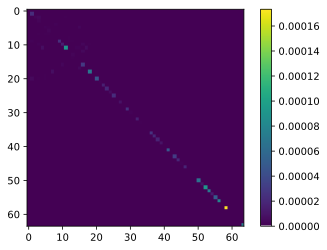

In [12]:
arr = 1
Vread = 0.2
gain = -1
input = [0x1<<i for i in range(64)]
Gmap = a0.pic_dpe_batch(arr, input, gain=gain, Vread=Vread, Tdly=10000) / Vread
plt.imshow(Gmap)
plt.colorbar()

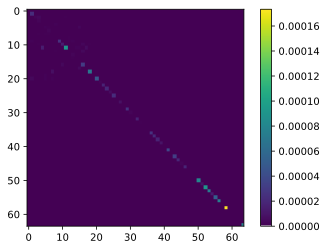

In [8]:
plt.imshow(Gmap1post2)
plt.colorbar()

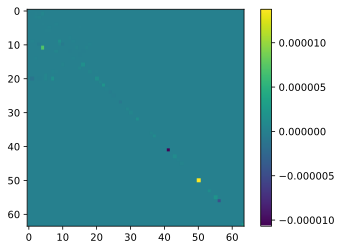

In [13]:
plt.imshow(Gmap1post2-Gmap)
plt.colorbar()

In [5]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('schroedinger_superT_v1.mat')
# Scale the conductances by 4x to get better separation
G_neg = 4*mat_contents['G_neg']

arr = 1
Vgate = 5
Vref = 0.5
vRead = 0.2

targetTolerance = 4e-6

targetG = np.zeros((64,64))
targetG[0:64,0:64] = G_neg[0:64,0:64]

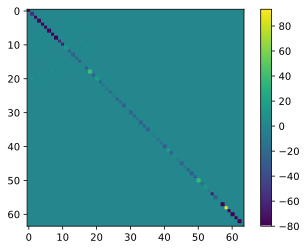

In [15]:
plt.imshow(1e6*(Gmap-targetG))
plt.colorbar()

In [7]:
arr = 1
numRows = 64
numCols = 64
Vgate = 5
vRead = 0.2
Gmap1post2 = np.zeros((64, 64))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            #rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap1post2[rr,cc] = rdCurr/vRead

In [26]:
write_width = hex(255*round(1e-6*1/(255/50e6))) #width / 20 ns
print(write_width)

0x0


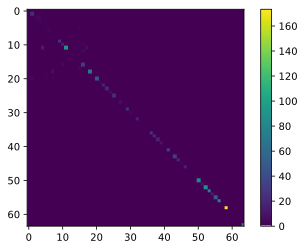

In [27]:
plt.imshow(1e6*(Gmap1post2))
plt.colorbar()